# SIR dynamics with varying parameters

In the first week, you gained first experience with coding simple models in R using the deSolve package. Last week, you went into further details about the drivers of an epidemic and the dynamics of the SIR model. This week, we are bringing this together to think more deeply about the roles of $\beta$ and $\gamma$.

### Question: Imagine a disease where every person infects 1 person on average, every 2 days, and is infectious for 4 days. What are the values for $\beta$ and $\gamma$?

$\beta$ would be 1/2.

$\gamma$ would be 1/4.

So far, when looking at the dynamics of an epidemic, we have always plotted the number of people in each compartment. Sometimes however it is more informative to look at the proportion of the population in each compartment rather than the actual number, particularly if the population size changes over time. Although we are modelling an epidemic in a closed population with constant population size in this etivity, it is a good opportunity to practice plotting the prevalence as a proportion of the total population who are in the $S$, $I$ and $R$ compartments. To do this, it is helpful to first think about which variables you need to calculate this at each timestep.

Model the epidemic with the $\beta$ and $\gamma$ values you calculated above, assuming introduction of a single infected person in a totally susceptible population of 1 million. Remember, if you have been saving your code somewhere, you can open that and copy-paste the SIR code you have previously developed. You might also have to try different durations to run the model for. Then plot the proportion of susceptible, infected and recovered people over time.

### Question: What do you observe?

In [5]:
# LOAD THE PACKAGES:
library(deSolve)
library(reshape2)
library(ggplot2)

# MODEL INPUTS:

initial_state_values <- c(S = 1e6 - 1,
                          I = 1,
                          R = 0)
parameters <- c(beta = 0.5, gamma = 0.25)

# TIMESTEPS:

times <- seq(from = 0, to = 120, by = 1)

sir_model <- function(time, state, parameters) {  
    
    with(as.list(c(state, parameters)), {     
      
        N <- S+I+R
        lambda <- beta * I/N
        dS <- -lambda * S
        dI <- lambda * S - gamma * I
        dR <- gamma * I
    
        return(list(c(dS, dI, dR))) 
    })
  
}

# MODEL OUTPUT (solving the differential equations):

output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))

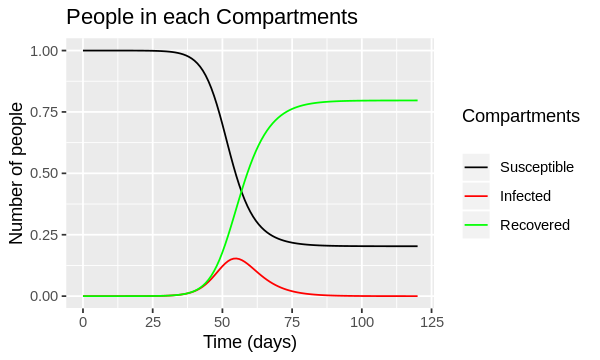

In [6]:
# Plot:

output_long <- melt(as.data.frame(output), id = "time")                  

options(repr.plot.width = 5, repr.plot.height = 3)
ggplot(data = output_long,          # specify object containing data to plot
       aes(x = time, y = value / 1e6, group = variable, colour = variable)) +   # assign columns to axes and groups
  geom_line() +                     # represent data as lines
  labs(title = "People in each Compartments", x = "Time (days)", y = "Number of people", color = "Compartments\n") +
  scale_color_manual(labels = c("Susceptible", "Infected", "Recovered"), values = c("black", "red", "green"))

The peak is around 55 days with less than 12.5% being infected. About 20% never get infected and epidemy period will be around 100 days.

Now imagine an intervention is introduced to control infection, for example infected people are isolated so that they cannot spread infection. As a result, $\beta$ drops to 0.1. Model the epidemic under this new scenario. 

### Question: What do you observe?

In [7]:
parameters <- c(beta = 0.1, gamma = 0.25)

output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))

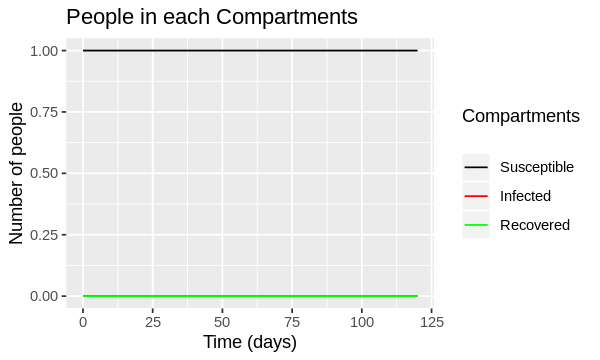

In [8]:
# Plot:

output_long <- melt(as.data.frame(output), id = "time")                  

options(repr.plot.width = 5, repr.plot.height = 3)
ggplot(data = output_long,          # specify object containing data to plot
       aes(x = time, y = value / 1e6, group = variable, colour = variable)) +   # assign columns to axes and groups
  geom_line() +                     # represent data as lines
  labs(title = "People in each Compartments", x = "Time (days)", y = "Number of people", color = "Compartments\n") +
  scale_color_manual(labels = c("Susceptible", "Infected", "Recovered"), values = c("black", "red", "green"))

With $\beta$ = 0.1 no epidemic occurs.

In your code above, vary $\gamma$ with $\beta$ held constant at 0.1 days$^{-1}$. Notice that there are some values where the initial infected case fails to cause an epidemic.

In [9]:
run_sir_model <- 
    function(beta, gamma, S0 = 1e6 - 1, I0 = 1, R0 = 1, duration = 120) {
  
  initial_state_values <- c(S = S0,  # nearly the whole population we are 
                                     # modelling is susceptible to infection
                            I = I0,  # the epidemic starts with a single
                                     # infected person
                            R = R0)  # there is no prior immunity in the
                                     # population
  
  parameters <- c(beta = beta, # the rate of infection, 
                               
                  gamma = gamma)  # the rate of recovery, 
                                  # which acts on those infected

  times <- seq(from = 0, to = duration, by = 1) 
  
  output <- as.data.frame(ode(y = initial_state_values, 
                              times = times, 
                              func = sir_model,
                              parms = parameters))
  
  # Plotting the output
  plot(x = output$time,             # time on the x axis
       y = output$S,                # the number of susceptible people at
                                      # each timestep on the y axis
       type = "l",                  # type = "l" tells R we want lines 
                                      # rather than points
       ylim = c(0,(S0+I0+R0)),      # the limits of the y axis
                                      # (from 0 to the total number of 
                                      # people)
      
      xlab = "Time (days)", 
      ylab = "Number of people")    # add axis labels
  
  lines(x = output$time,            # add the number of
        y = output$I,                 # infected people at each
        col = "red")                  # timestep on the y axis
                                                    
                                                   
  lines(x = output$time,            # number of recovered
        y = output$R,                 # people at each
        col = "green")                 # timestep on the y axis
                                                  
  legend(x = "top",                     # add a legend on the right-hand
                                            # side of the plot
         legend = c("S", "I", "R"),       # labels S, I and R for black, 
         col = c("black", "red", "green"),   # red, blue lines respectively
         lty = c(1,1))                    # both lines are
                                            # solid linetype (lty = 1)
  title(main = paste("beta =", beta,      # main title
                     "\ngamma =", gamma))
}

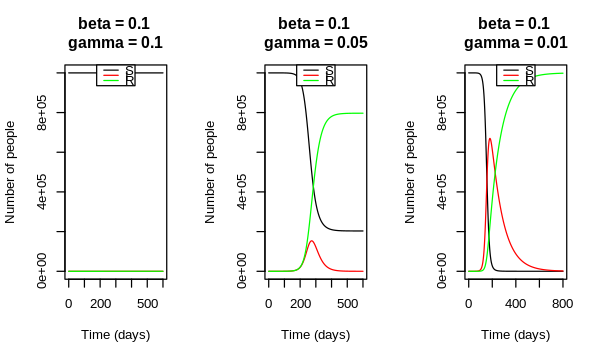

In [16]:
# Prepare the format for the plot display
par(mfrow = c(1,3))  # Show 2*4 separate plots in one page
                     # (2 rows, 4 per row)

run_sir_model(beta = 0.1, 
              gamma = 0.1, 
              duration = 600)
run_sir_model(beta = 0.1, 
              gamma = 0.05, 
              duration = 600) 
run_sir_model(beta = 0.1, 
              gamma = 0.01, 
              duration = 800)

### Question: Assuming $\beta$ equals 0.1 days$^{-1}$, what value of $\gamma$ do you need in order to get an epidemic? In real life, what could give rise to such a change in $\gamma$?
*Hint: as the infection rate becomes lower, i.e. the infection spreads more slowly, you have to follow the population over a longer period to observe a visible change in the proportion infected.*

With $\gamma$ < 0.1 small epidemics will appear and they took a realy long time (few years). Changes in social behaviour and recovery rate make $\gamma$ values change.

You should see that different combinations of infection and recovery rates can give rise to very different infection dynamics. 

### Question: Based on your answers to the previous question, can you think of a condition involving $\beta$ and $\gamma$ that is necessary for an epidemic? Test this condition using your code above.

The ratio of $\gamma$/$\beta$ should be greater than one for epidemy to start.

**Don't forget to check the correct answers provided in the Solutions!**